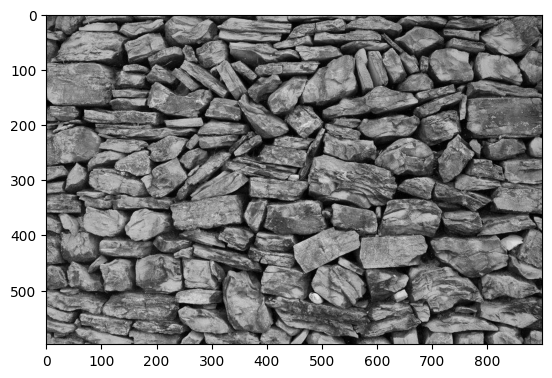

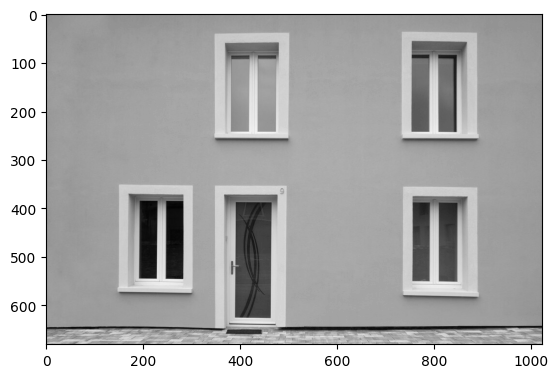

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 


ima1 = plt.imread(r"D:\users\Téléchargements\image_1_gray.jpg")
ima2 = plt.imread(r"D:\users\Téléchargements\image_2_gray.jpg")
plt.imshow(ima1, cmap='gray')
plt.show()
plt.imshow(ima2, cmap='gray')

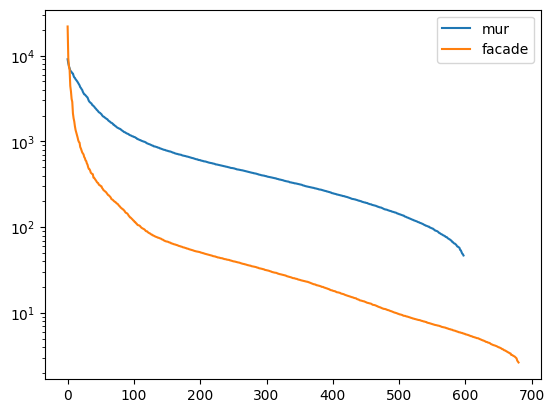

In [14]:
ima1_moy = np.mean(ima1, 1)
ima2_moy = np.mean(ima2, 1)

diff_im1 = ima1 - ima1_moy[:, None]
diff_im2 = ima2 - ima2_moy[:, None]

U1, S1, V1 = np.linalg.svd(diff_im1)
U2, S2, V2 = np.linalg.svd(diff_im2)
plt.plot(S1, label="mur")
plt.plot(S2, label="facade")
plt.yscale("log")
plt.legend()




on remarque que pour le mur, il faut garder plus d'élements (axe des x) pente moins abrupte  

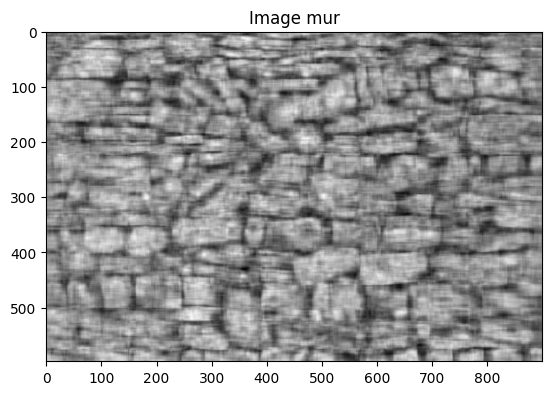

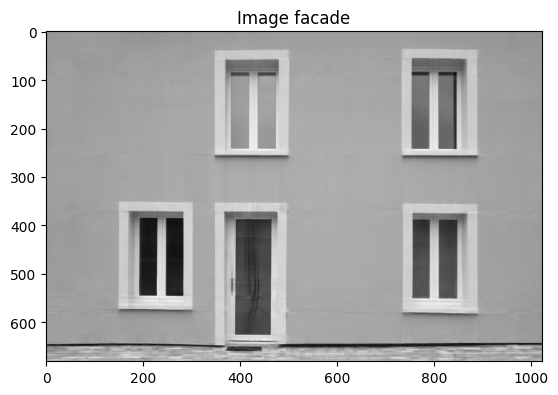

In [17]:
r = 20 

U1red = U1[:,0:r]
P1red = U1red @ U1red.T
diff1_red = P1red @ diff_im1
ima1_red = diff1_red + ima1_moy[:,None]

U2red = U2[:,0:r]
P2red = U2red@U2red.T
diff2_red = P2red @ diff_im2
ima2_red = diff2_red + ima2_moy[:,None]

plt.imshow(ima1_red, cmap='gray')
plt.title('Image mur')
plt.show()

plt.imshow(ima2_red, cmap='gray')
plt.title('Image facade')
plt.show()



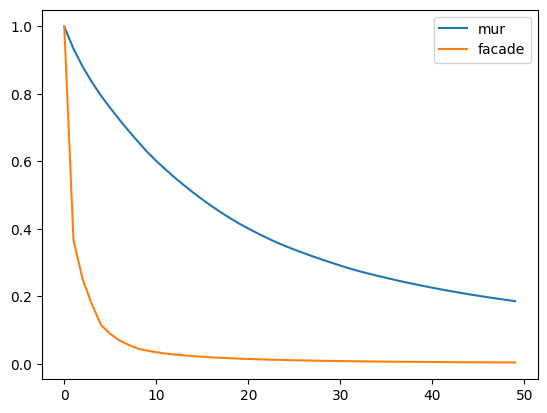

In [18]:
rmax = 50 

E1 = np.zeros(np.min(np.size(ima1)))
E2 = np.zeros(np.min(np.size(ima2)))

S1p = np.insert(S1, 0, 0)
S2p = np.insert(S2, 0, 0)
E1 = 1 - np.cumsum(S1p**2) / np.sum(S1p**2)
E2 = 1 - np.cumsum(S2p**2) / np.sum(S2p**2)

plt.plot(np.linspace(0, rmax-1, rmax), E1[0:rmax] , label='mur')
plt.plot(np.linspace(0, rmax-1, rmax), E2[0:rmax] , label='facade')
plt.legend()
plt.show()